In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
# import randomized search
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go
from prophet.diagnostics import cross_validation, performance_metrics
from common.preprocessor import load_data
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [20]:
# Load dataset
data = load_data('./data','Commodity Prices Monthly.csv')

In [21]:
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [22]:
data = data.reset_index()

In [23]:
data.head()

,index,Price
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [24]:
data.columns = ['ds', 'y']

In [25]:
data

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
247,2022-08-01,97.74
248,2022-09-01,90.57
249,2022-10-01,93.60
250,2022-11-01,90.38


In [26]:
data[['y']]

,y
0,19.96
1,20.19
2,24.03
3,26.03
4,25.69
...,...
247,97.74
248,90.57
249,93.60
250,90.38


In [27]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [28]:
data.describe() # display the summary statistics of the data


,y
count,252.000000
mean,69.464722
std,28.030720
min,19.960000
25%,48.472500
50%,65.475000
75%,91.955000
max,134.790000


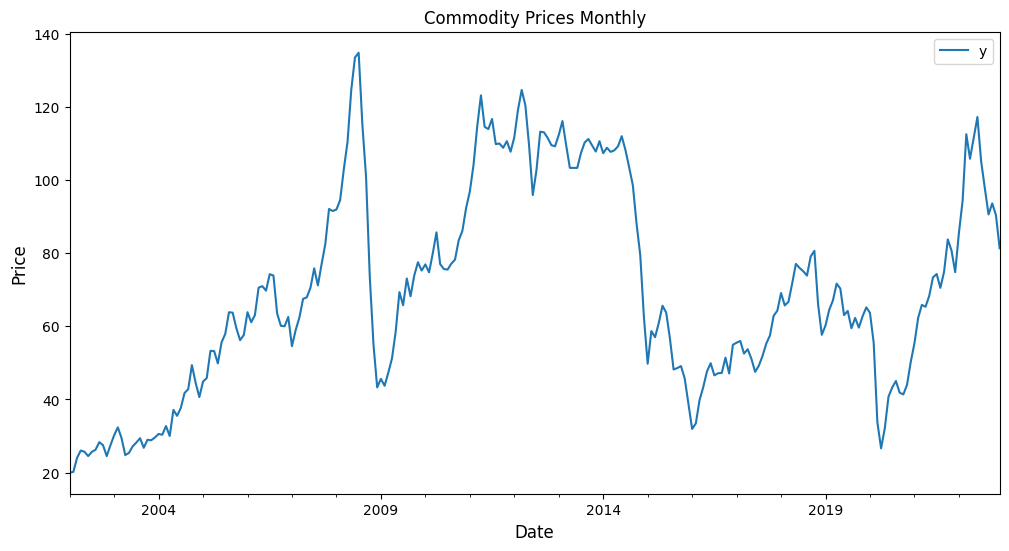

In [29]:
# plot the data
data.plot(x='ds', y= 'y', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [30]:
# set training and testing start dates
train = data[['ds', 'y']].copy()
test = data[['ds', 'y']].copy()

In [31]:
train = train[train['ds'] < '2019-01-01']
test = test[test['ds'] >= '2019-01-01']

train.head()

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [32]:
test.head()

,ds,y
204,2019-01-01,60.23
205,2019-02-01,64.50
206,2019-03-01,67.05
207,2019-04-01,71.66
208,2019-05-01,70.30


In [33]:
# train = pd.read_csv('train_data.csv')
# test = pd.read_csv('test_data.csv')

In [34]:
Prophet??

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Source:        
class Prophet(object):
    """Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoin

In [35]:
from sklearn.base import BaseEstimator
# perform hyperparameter tuning with randomized search
# define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [10, 20, 30, 40, 50],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'daily_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'yearly_seasonality': [True, False]
}

# initialize the model
class ProphetEstimator(BaseEstimator):
    def __init__(self, **kwargs):
        self.model = Prophet(**kwargs)
    
    def fit(self, X, y=None):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        prediction = self.predict(X)
        return mean_absolute_error(y, predictions)
# {'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 10, 'holidays_prior_scale': 0.1, 'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.1}

# initialize the model
model = ProphetEstimator(seasonality_prior_scale=0.1, seasonality_mode='multiplicative', n_changepoints=10, holidays_prior_scale=0.1, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True, changepoint_prior_scale=0.1)

# perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train)


Fitting 5 folds for each of 5120 candidates, totalling 25600 fits


ValueError: Invalid parameter 'changepoint_prior_scale' for estimator ProphetEstimator(). Valid parameters are: [].

In [ ]:

# Initialize the Prophet model
model = Prophet()

In [ ]:
# Fit the model with your training data
model.fit(train)

16:55:16 - cmdstanpy - INFO - Chain [1] start processing


16:55:16 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
test.shape

(48, 2)

In [ ]:

# Create an empty dataframe to hold your future predictions
future = model.make_future_dataframe(periods=len(test), freq='MS', include_history=True)
future.shape

(252, 1)

In [ ]:
# Use the model to make predictions
forecast = model.predict(future)

In [ ]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2002-01-01,20.878677
1,2002-02-01,23.010893
2,2002-03-01,25.932340
3,2002-04-01,28.816802
4,2002-05-01,29.915018
...,...,...
247,2022-08-01,25.174667
248,2022-09-01,23.411628
249,2022-10-01,21.781333
250,2022-11-01,18.734291


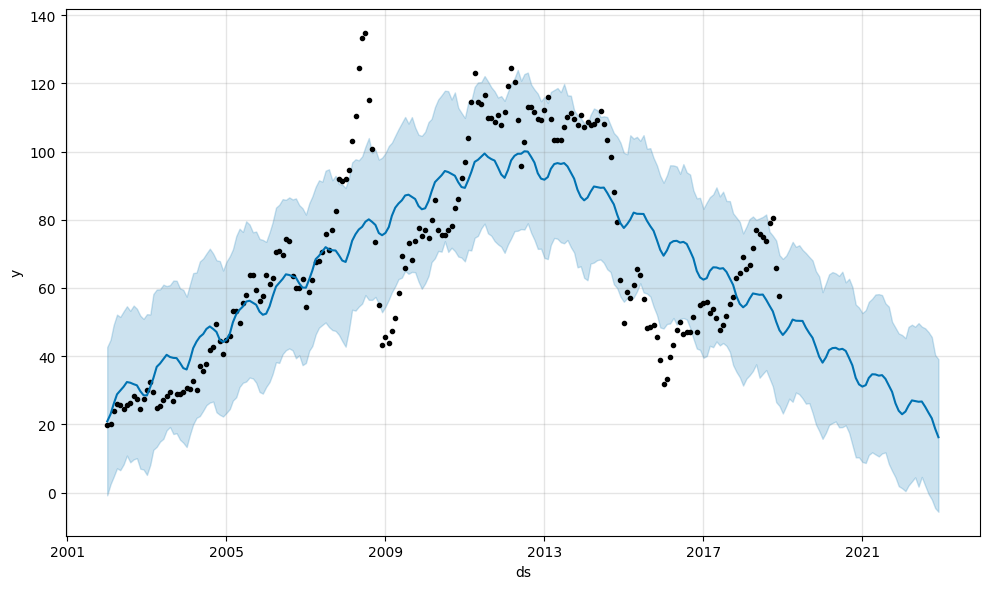

In [ ]:

# Plot the original data and the forecast
model.plot(forecast)
plt.show()

In [ ]:
# plot actual vs predicted
fig = go.Figure([go.Scatter(x=data['ds'], y=data['y'],mode='lines',
                    name='Actual')])
#You can add traces using an Express plot by using add_trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                   mode='lines+markers',
                    name='predicted'))
#To display a figure using the renderers framework, you call the .show() method on a graph object figure, or pass the figure to the plotly.io.show function. 
#With either approach, plotly.py will display the figure using the current default renderer(s).
fig.show()

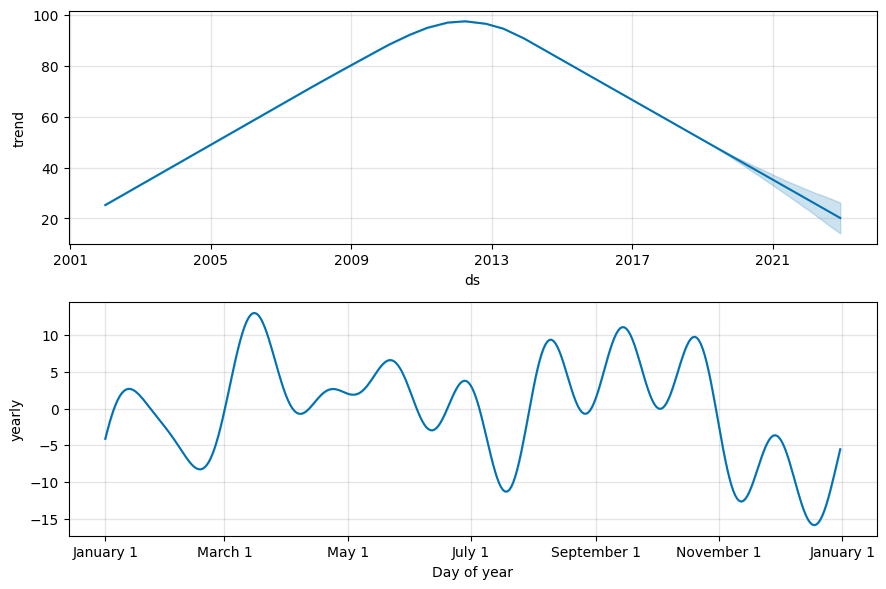

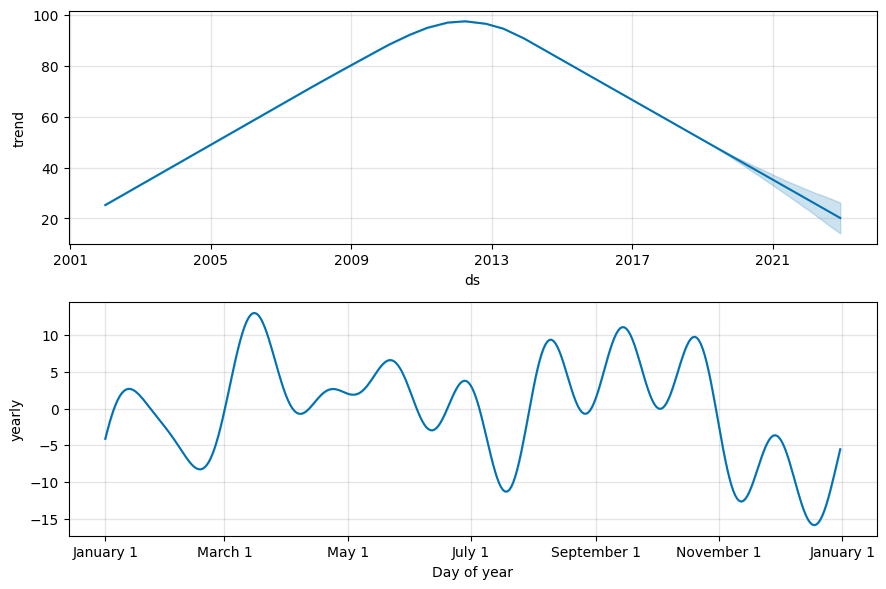

In [ ]:
model.plot_components(forecast)

In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2002-01-01,20.878677
1,2002-02-01,23.010893
2,2002-03-01,25.932340
3,2002-04-01,28.816802
4,2002-05-01,29.915018
...,...,...
247,2022-08-01,25.174667
248,2022-09-01,23.411628
249,2022-10-01,21.781333
250,2022-11-01,18.734291


In [ ]:
data

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
247,2022-08-01,97.74
248,2022-09-01,90.57
249,2022-10-01,93.60
250,2022-11-01,90.38


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2002-01-01,20.878677
1,2002-02-01,23.010893
2,2002-03-01,25.932340
3,2002-04-01,28.816802
4,2002-05-01,29.915018
...,...,...
247,2022-08-01,25.174667
248,2022-09-01,23.411628
249,2022-10-01,21.781333
250,2022-11-01,18.734291


In [ ]:
# evaluation with mae and mape
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(data['y'], forecast['yhat'])
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 18.138


In [ ]:
mape = mean_absolute_percentage_error(data['y'], forecast['yhat'])
print('Mean Absolute Percentage Error: %.3f' % mape)

Mean Absolute Percentage Error: 0.270


### Introducing Hyper parameter tuning


In [ ]:
tuned_model=Prophet(yearly_seasonality=True).add_seasonality(name='yearly',period=len(test),fourier_order=70)

In [ ]:
tuned_model.fit(train)


16:55:19 - cmdstanpy - INFO - Chain [1] start processing
16:55:19 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
tuned_model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future_dates=tuned_model.make_future_dataframe(periods=len(test),freq='MS',include_history=True)


In [ ]:
future_dates=tuned_model.predict(future_dates)

In [ ]:
# Calculate the mean absolute error (MAE) using the consistent data
tuned_mae = mean_absolute_error(data['y'][:len(future_dates)], future_dates['yhat'][:len(data)])
print('Mean Absolute Error: %.3f' % tuned_mae)


Mean Absolute Error: 18.138


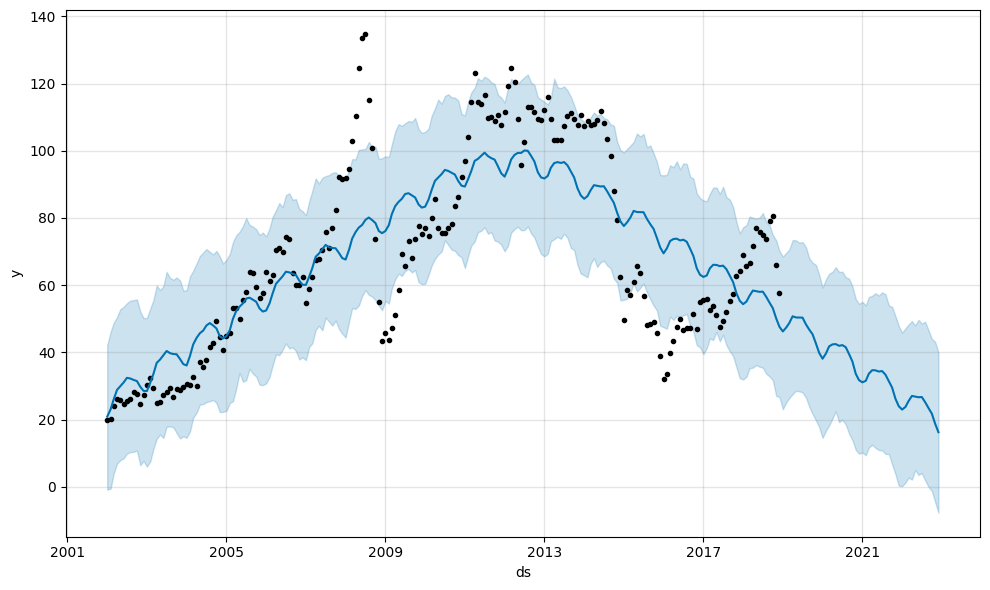

In [ ]:
tuned_model.plot(future_dates)
plt.show()

In [36]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'n_changepoints': [10, 20, 30, 40, 50],
#     'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'seasonality_mode': ['additive', 'multiplicative'],
#     'daily_seasonality': [True, False],
#     'weekly_seasonality': [True, False],
#     'yearly_seasonality': [True, False]
# }

# # Initialize the model
# model = Prophet()

# # Perform grid search
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(train)

# # Evaluate the best model
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

In [37]:
# def objective_function(args_list):
#     global train, test

#     params_evaluated = []
#     results = []

#     for params in args_list:
#         try:
#             model = Prophet(**params)
#             model.fit(train)
#             future = model.make_future_dataframe(periods=len(test), freq='MS')
#             forecast = model.predict(future)
#             predictions_tuned = forecast.tail(len(test))
#             error = mape(test['y'], predictions_tuned['yhat'])

#             params_evaluated.append(params)
#             results.append(error)
#         except:
#             #print(f"Exception raised for {params}")
#             #pass
#             params_evaluated.append(params)
#             results.append(18.12)# Giving high loss for exceptions regions of spaces

#         #print(params_evaluated, mse)
#     return params_evaluated, results

In [38]:
# from scipy.stats import uniform


# param_space = dict(growth = ['linear', 'logistic', 'flat'],
#                    n_changepoints  = range(0, 55, 5),
#                    changepoint_range  = uniform(0.5, 0.5),
#                    yearly_seasonality = [True, False],
#                 #    weekly_seasonality = [True, False],
#                 #    daily_seasonality = [True, False],
#                    seasonality_mode = ['additive', 'multiplicative'],
#                    seasonality_prior_scale=uniform(5.0, 15.0),
#                    changepoint_prior_scale=uniform(0.0, 0.1),
#                    interval_width = uniform(0.2, 0.8),
#                    uncertainty_samples = [500, 1000, 1500, 2000]
#                    )

In [39]:
# conf_Dict = dict()
# conf_Dict['initial_random'] = 10
# conf_Dict['num_iteration'] = 50

In [40]:
# from mango import scheduler, Tuner
# tuner = Tuner(param_space, objective_function, conf_Dict)

In [41]:
# results = tuner.minimize()
# print('best parameters:', results['best_params'])
# print('best loss:', results['best_objective'])

In [42]:
??Prophet

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Source:        
class Prophet(object):
    """Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoin